In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Defining Learning Parameters

In [20]:
# learning parameters
batch_size = 512
# epochs = 100
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare Training Dataset

In [21]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [22]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [23]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [24]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for Training

In [25]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [26]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [27]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [28]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [29]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)


In [30]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)


In [31]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Writing Training Loop

118it [00:39,  2.99it/s]                                                        


Epoch 1 of 100
Generator loss: 2.07966605, Discriminator loss: 0.63013736


118it [00:40,  2.92it/s]                                                        


Epoch 2 of 100
Generator loss: 3.45012184, Discriminator loss: 0.65404865


118it [00:42,  2.80it/s]                                                        


Epoch 3 of 100
Generator loss: 4.34145895, Discriminator loss: 0.68475871


118it [00:43,  2.70it/s]                                                        


Epoch 4 of 100
Generator loss: 3.89358148, Discriminator loss: 0.56478891


118it [00:43,  2.72it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


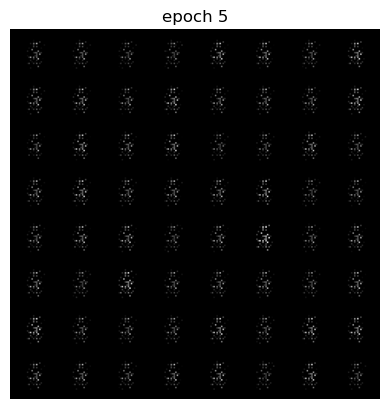

Epoch 5 of 100
Generator loss: 4.19216892, Discriminator loss: 0.33386688


118it [00:43,  2.74it/s]                                                        


Epoch 6 of 100
Generator loss: 5.50568088, Discriminator loss: 0.12219347


118it [00:43,  2.72it/s]                                                        


Epoch 7 of 100
Generator loss: 5.06073098, Discriminator loss: 0.09772230


118it [00:43,  2.71it/s]                                                        


Epoch 8 of 100
Generator loss: 5.10621018, Discriminator loss: 0.22678253


118it [00:43,  2.71it/s]                                                        


Epoch 9 of 100
Generator loss: 5.92700969, Discriminator loss: 0.06822041


118it [00:43,  2.70it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


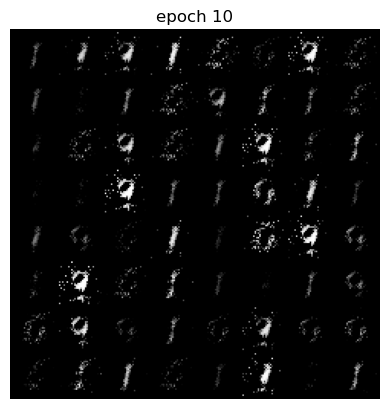

Epoch 10 of 100
Generator loss: 6.34697425, Discriminator loss: 0.09751921


118it [00:43,  2.70it/s]                                                        


Epoch 11 of 100
Generator loss: 5.54190047, Discriminator loss: 0.19450815


118it [00:44,  2.67it/s]                                                        


Epoch 12 of 100
Generator loss: 5.47598642, Discriminator loss: 0.15953896


118it [00:43,  2.70it/s]                                                        


Epoch 13 of 100
Generator loss: 5.47156535, Discriminator loss: 0.13931102


118it [00:43,  2.69it/s]                                                        


Epoch 14 of 100
Generator loss: 6.05827708, Discriminator loss: 0.24238190


118it [00:44,  2.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


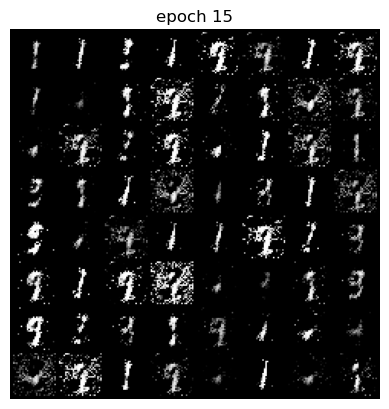

Epoch 15 of 100
Generator loss: 4.87173083, Discriminator loss: 0.14953318


118it [00:43,  2.68it/s]                                                        


Epoch 16 of 100
Generator loss: 5.00063695, Discriminator loss: 0.25910229


118it [00:44,  2.67it/s]                                                        


Epoch 17 of 100
Generator loss: 5.14187156, Discriminator loss: 0.20300302


118it [00:43,  2.68it/s]                                                        


Epoch 18 of 100
Generator loss: 5.26597710, Discriminator loss: 0.15878061


118it [00:45,  2.61it/s]                                                        


Epoch 19 of 100
Generator loss: 4.70614026, Discriminator loss: 0.26910391


118it [00:44,  2.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


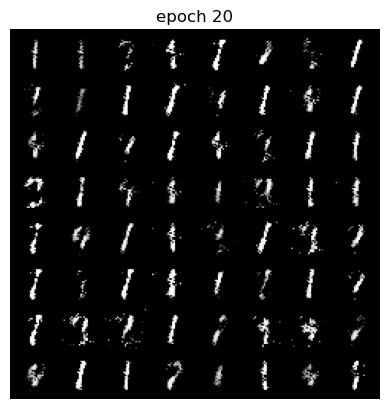

Epoch 20 of 100
Generator loss: 4.82594071, Discriminator loss: 0.16397436


118it [00:44,  2.68it/s]                                                        


Epoch 21 of 100
Generator loss: 4.94645108, Discriminator loss: 0.20575106


118it [00:44,  2.68it/s]                                                        


Epoch 22 of 100
Generator loss: 5.07876255, Discriminator loss: 0.16090741


118it [00:44,  2.64it/s]                                                        


Epoch 23 of 100
Generator loss: 4.58779259, Discriminator loss: 0.21377355


118it [00:44,  2.66it/s]                                                        


Epoch 24 of 100
Generator loss: 3.96787944, Discriminator loss: 0.31036202


118it [00:44,  2.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


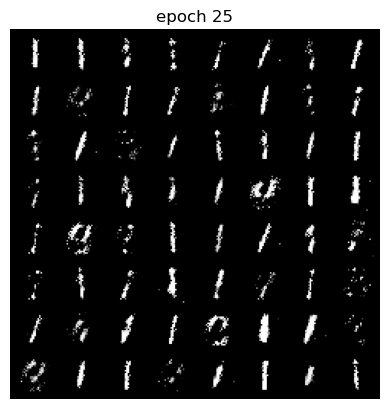

Epoch 25 of 100
Generator loss: 4.11906876, Discriminator loss: 0.23015909


118it [00:43,  2.68it/s]                                                        


Epoch 26 of 100
Generator loss: 4.43217015, Discriminator loss: 0.21298247


118it [00:44,  2.66it/s]                                                        


Epoch 27 of 100
Generator loss: 4.05485877, Discriminator loss: 0.25759357


118it [00:44,  2.63it/s]                                                        


Epoch 28 of 100
Generator loss: 3.66065891, Discriminator loss: 0.26759919


118it [00:43,  2.69it/s]                                                        


Epoch 29 of 100
Generator loss: 3.50962279, Discriminator loss: 0.29280415


118it [00:44,  2.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


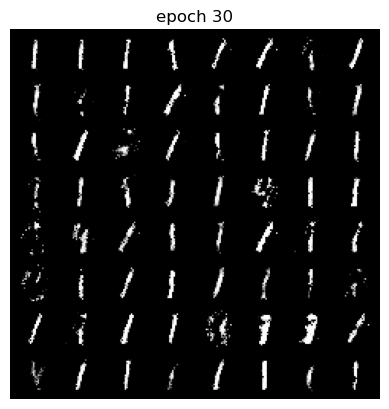

Epoch 30 of 100
Generator loss: 3.52151796, Discriminator loss: 0.28312364


118it [00:44,  2.68it/s]                                                        


Epoch 31 of 100
Generator loss: 3.33909963, Discriminator loss: 0.30746963


118it [00:44,  2.65it/s]                                                        


Epoch 32 of 100
Generator loss: 3.40860037, Discriminator loss: 0.27522117


118it [00:43,  2.69it/s]                                                        


Epoch 33 of 100
Generator loss: 3.33785392, Discriminator loss: 0.29636383


118it [00:44,  2.65it/s]                                                        


Epoch 34 of 100
Generator loss: 3.07707996, Discriminator loss: 0.32810849


118it [00:44,  2.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


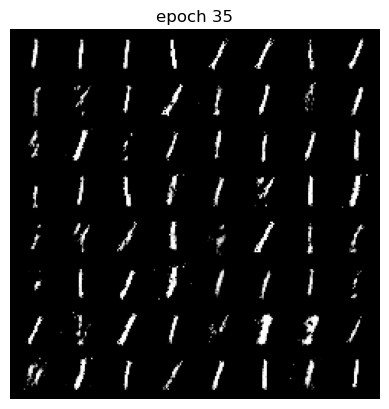

Epoch 35 of 100
Generator loss: 3.16284089, Discriminator loss: 0.32516445


118it [00:43,  2.68it/s]                                                        


Epoch 36 of 100
Generator loss: 3.03371651, Discriminator loss: 0.35194027


118it [00:44,  2.68it/s]                                                        


Epoch 37 of 100
Generator loss: 3.03947294, Discriminator loss: 0.35726717


118it [00:43,  2.68it/s]                                                        


Epoch 38 of 100
Generator loss: 2.97577442, Discriminator loss: 0.34952381


118it [00:44,  2.68it/s]                                                        


Epoch 39 of 100
Generator loss: 2.91201796, Discriminator loss: 0.35142510


118it [00:44,  2.68it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


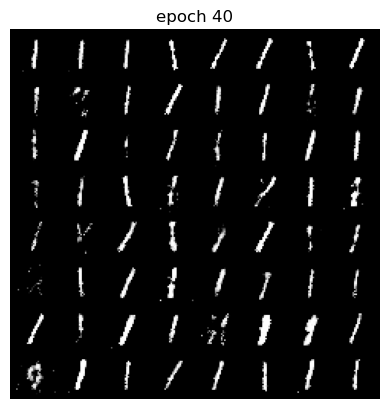

Epoch 40 of 100
Generator loss: 2.90266613, Discriminator loss: 0.34852090


118it [00:43,  2.68it/s]                                                        


Epoch 41 of 100
Generator loss: 2.91089359, Discriminator loss: 0.34832527


118it [00:47,  2.47it/s]                                                        


Epoch 42 of 100
Generator loss: 2.91669401, Discriminator loss: 0.34503568


118it [00:44,  2.64it/s]                                                        


Epoch 43 of 100
Generator loss: 2.79249444, Discriminator loss: 0.36227503


118it [00:44,  2.65it/s]                                                        


Epoch 44 of 100
Generator loss: 2.66298762, Discriminator loss: 0.37460024


118it [00:45,  2.57it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


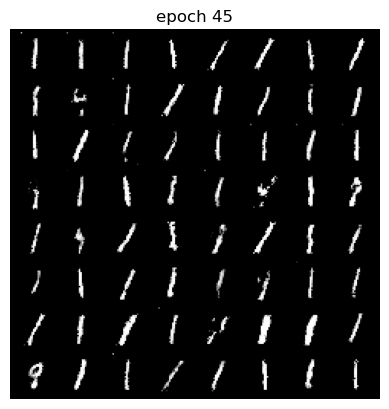

Epoch 45 of 100
Generator loss: 2.70921903, Discriminator loss: 0.36155760


118it [00:47,  2.51it/s]                                                        


Epoch 46 of 100
Generator loss: 2.70211897, Discriminator loss: 0.37937679


118it [00:44,  2.67it/s]                                                        


Epoch 47 of 100
Generator loss: 2.75109403, Discriminator loss: 0.37926636


118it [00:44,  2.67it/s]                                                        


Epoch 48 of 100
Generator loss: 2.76892366, Discriminator loss: 0.38146827


118it [00:44,  2.67it/s]                                                        


Epoch 49 of 100
Generator loss: 2.69973193, Discriminator loss: 0.38860070


118it [00:44,  2.68it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


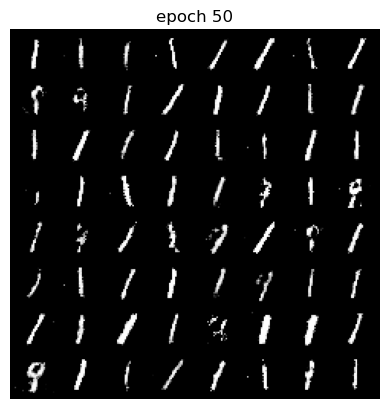

Epoch 50 of 100
Generator loss: 2.74480648, Discriminator loss: 0.39212016


118it [00:44,  2.67it/s]                                                        


Epoch 51 of 100
Generator loss: 2.56300501, Discriminator loss: 0.41296145


118it [00:44,  2.68it/s]                                                        


Epoch 52 of 100
Generator loss: 2.51420709, Discriminator loss: 0.42395774


118it [00:43,  2.68it/s]                                                        


Epoch 53 of 100
Generator loss: 2.51107966, Discriminator loss: 0.43392790


118it [00:43,  2.69it/s]                                                        


Epoch 54 of 100
Generator loss: 2.58562525, Discriminator loss: 0.42943530


118it [00:44,  2.63it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


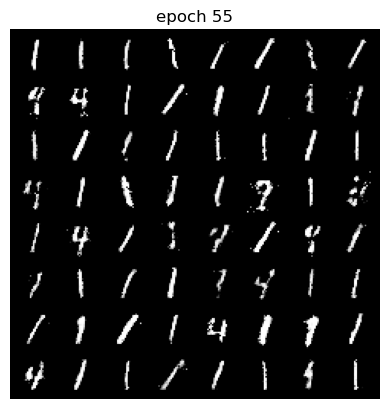

Epoch 55 of 100
Generator loss: 2.50121550, Discriminator loss: 0.43843048


118it [00:44,  2.67it/s]                                                        


Epoch 56 of 100
Generator loss: 2.50574729, Discriminator loss: 0.45171266


118it [00:44,  2.64it/s]                                                        


Epoch 57 of 100
Generator loss: 2.47397277, Discriminator loss: 0.46342640


118it [00:43,  2.70it/s]                                                        


Epoch 58 of 100
Generator loss: 2.54883094, Discriminator loss: 0.44591189


118it [00:43,  2.69it/s]                                                        


Epoch 59 of 100
Generator loss: 2.54733437, Discriminator loss: 0.45902719


118it [00:44,  2.68it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


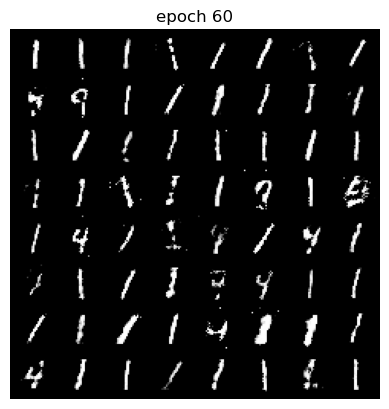

Epoch 60 of 100
Generator loss: 2.46692899, Discriminator loss: 0.45913741


118it [00:44,  2.68it/s]                                                        


Epoch 61 of 100
Generator loss: 2.47513252, Discriminator loss: 0.44983704


118it [00:44,  2.68it/s]                                                        


Epoch 62 of 100
Generator loss: 2.46142519, Discriminator loss: 0.48238823


118it [00:44,  2.67it/s]                                                        


Epoch 63 of 100
Generator loss: 2.48104269, Discriminator loss: 0.48698585


118it [00:44,  2.66it/s]                                                        


Epoch 64 of 100
Generator loss: 2.40278082, Discriminator loss: 0.49465927


118it [00:44,  2.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


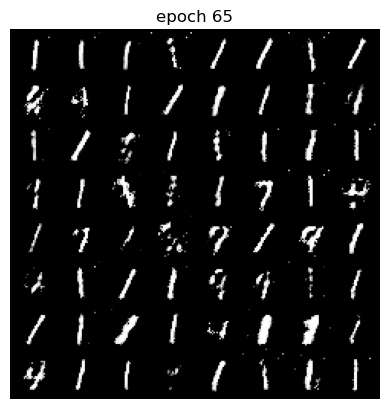

Epoch 65 of 100
Generator loss: 2.38305829, Discriminator loss: 0.50472534


118it [00:44,  2.66it/s]                                                        


Epoch 66 of 100
Generator loss: 2.46950302, Discriminator loss: 0.48666514


118it [00:43,  2.68it/s]                                                        


Epoch 67 of 100
Generator loss: 2.49599473, Discriminator loss: 0.46495610


118it [00:44,  2.67it/s]                                                        


Epoch 68 of 100
Generator loss: 2.43622085, Discriminator loss: 0.49117959


118it [00:44,  2.64it/s]                                                        


Epoch 69 of 100
Generator loss: 2.45848537, Discriminator loss: 0.48978132


118it [00:44,  2.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


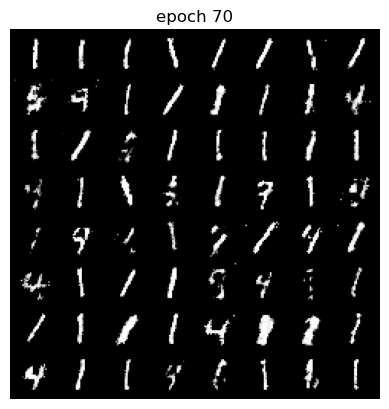

Epoch 70 of 100
Generator loss: 2.44662742, Discriminator loss: 0.48176371


118it [00:44,  2.67it/s]                                                        


Epoch 71 of 100
Generator loss: 2.37033811, Discriminator loss: 0.51080034


118it [00:44,  2.67it/s]                                                        


Epoch 72 of 100
Generator loss: 2.28000742, Discriminator loss: 0.53783624


118it [00:44,  2.66it/s]                                                        


Epoch 73 of 100
Generator loss: 2.15311564, Discriminator loss: 0.57646429


118it [00:43,  2.68it/s]                                                        


Epoch 74 of 100
Generator loss: 2.13231976, Discriminator loss: 0.59368516


118it [00:43,  2.69it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


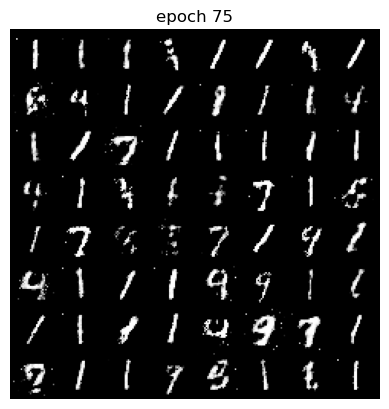

Epoch 75 of 100
Generator loss: 2.21002593, Discriminator loss: 0.56936904


118it [00:44,  2.66it/s]                                                        


Epoch 76 of 100
Generator loss: 2.13813800, Discriminator loss: 0.59069071


118it [00:44,  2.67it/s]                                                        


Epoch 77 of 100
Generator loss: 2.18515614, Discriminator loss: 0.58840112


118it [00:44,  2.67it/s]                                                        


Epoch 78 of 100
Generator loss: 2.20820803, Discriminator loss: 0.58731149


118it [00:43,  2.73it/s]                                                        


Epoch 79 of 100
Generator loss: 2.04366502, Discriminator loss: 0.63812181


118it [00:44,  2.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


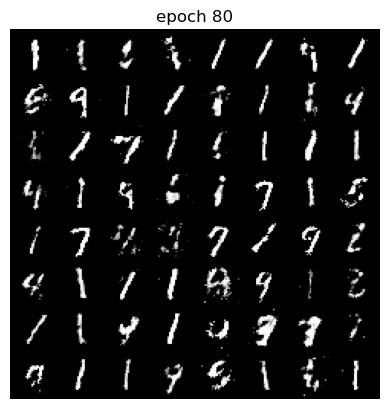

Epoch 80 of 100
Generator loss: 2.07146326, Discriminator loss: 0.64825965


118it [00:44,  2.67it/s]                                                        


Epoch 81 of 100
Generator loss: 2.06138132, Discriminator loss: 0.66654447


118it [00:44,  2.64it/s]                                                        


Epoch 82 of 100
Generator loss: 2.14844594, Discriminator loss: 0.63564221


118it [00:44,  2.68it/s]                                                        


Epoch 83 of 100
Generator loss: 2.09967658, Discriminator loss: 0.64097008


118it [00:44,  2.66it/s]                                                        


Epoch 84 of 100
Generator loss: 2.07984693, Discriminator loss: 0.64496802


118it [00:44,  2.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


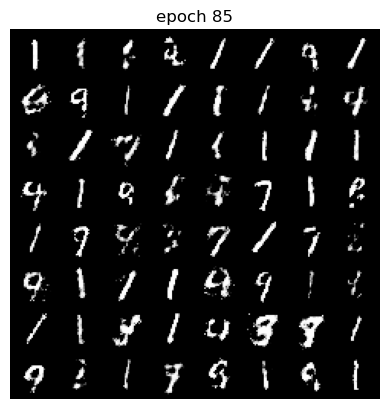

Epoch 85 of 100
Generator loss: 2.17190152, Discriminator loss: 0.62185610


118it [00:44,  2.65it/s]                                                        


Epoch 86 of 100
Generator loss: 2.00850854, Discriminator loss: 0.67429482


118it [00:44,  2.67it/s]                                                        


Epoch 87 of 100
Generator loss: 2.02658402, Discriminator loss: 0.69303481


118it [00:44,  2.68it/s]                                                        


Epoch 88 of 100
Generator loss: 2.02868939, Discriminator loss: 0.67790572


118it [00:44,  2.68it/s]                                                        


Epoch 89 of 100
Generator loss: 1.93586674, Discriminator loss: 0.71132099


118it [00:44,  2.67it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


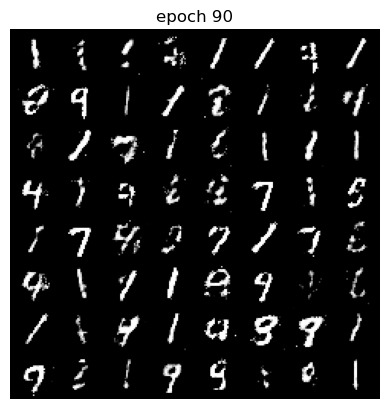

Epoch 90 of 100
Generator loss: 1.98680907, Discriminator loss: 0.70942708


118it [00:44,  2.64it/s]                                                        


Epoch 91 of 100
Generator loss: 1.94945820, Discriminator loss: 0.70990184


118it [00:44,  2.68it/s]                                                        


Epoch 92 of 100
Generator loss: 1.93240314, Discriminator loss: 0.71427550


118it [00:45,  2.62it/s]                                                        


Epoch 93 of 100
Generator loss: 1.80359279, Discriminator loss: 0.75938877


118it [00:44,  2.66it/s]                                                        


Epoch 94 of 100
Generator loss: 1.82775937, Discriminator loss: 0.77926401


118it [00:44,  2.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


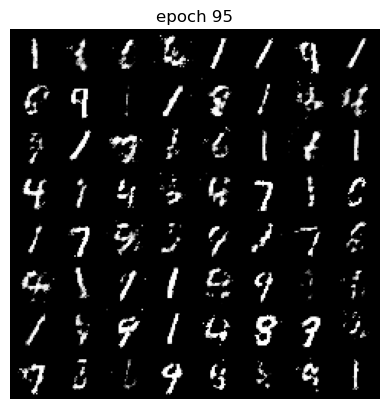

Epoch 95 of 100
Generator loss: 1.85947054, Discriminator loss: 0.75206360


118it [00:44,  2.64it/s]                                                        


Epoch 96 of 100
Generator loss: 1.90754543, Discriminator loss: 0.74366286


118it [00:44,  2.66it/s]                                                        


Epoch 97 of 100
Generator loss: 1.82685633, Discriminator loss: 0.75779813


118it [00:44,  2.65it/s]                                                        


Epoch 98 of 100
Generator loss: 1.78158122, Discriminator loss: 0.78401659


118it [00:44,  2.66it/s]                                                        


Epoch 99 of 100
Generator loss: 1.81162772, Discriminator loss: 0.79072167


118it [00:44,  2.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


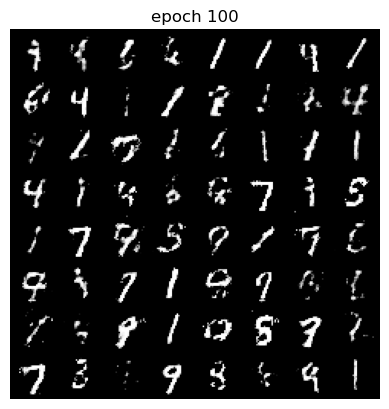

Epoch 100 of 100
Generator loss: 1.77121419, Discriminator loss: 0.79818835


In [32]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    
    optim_g.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    optim_g.step()
    return loss.item()
    #return loss
    
def discriminator_loss(output, true_label):

    optim_d.zero_grad()
    loss = criterion(output, true_label)
    loss.backward()
    optim_d.step()
    return loss.item()
    #return loss

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        
        
        reals,_ = data
        reals = reals.to(device)
        batch_size = reals.shape[0]
        
        # Train Discriminator with k steps
        for step in range(k):
            
            fake_data = generator(create_noise(batch_size, nz))
            fake_output = discriminator(fake_data)
            fake_label = label_fake(batch_size)
            fake_loss = discriminator_loss(fake_output, fake_label)
            
            real_data = reals
            real_output = discriminator(real_data)
            real_label = label_real(batch_size)
            real_loss = discriminator_loss(real_output, real_label)
            
            loss_d += (fake_loss + real_loss)
        
        
        # Train Generator
        fake_data = generator(create_noise(batch_size, nz)) 
        fake_output = discriminator(fake_data)
        fake_reals = label_real(batch_size)
        loss_g += generator_loss(fake_output, fake_reals)
            
    
#     loss_g = loss_g.detach().numpy()
#     loss_d = loss_d.detach().numpy()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
   
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")


In [33]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [34]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

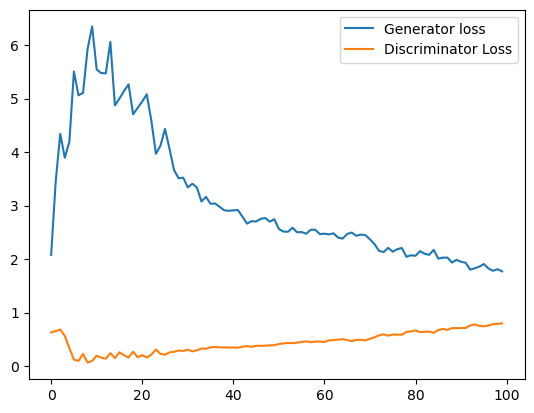

In [35]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')